### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 1.0 : Pandas:

1. Manejo de datos con pandas:

El siguiente [link](
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
), contiene un DataSet con informacion que permite predecir si un cancer es benigno o maligno. Un detalle del dataset es dado a continuación:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv

Para el dataset realizar lo siguiente:

1. Leer los datos desde un archivo en el  git_hub.

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

5. Encontrar los valores  diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Elimninar la columna id.

9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Laboratorio 1.1: Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


5. Para el data frame, seleccionemos solo los. datos del 2023.

5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

6. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]















<!--
En este [link](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) se encuentra un
  data set que tiene información de la temperatura de la tierra desde 1850. Descripción de cada unas de las variables e información es detallada en el interior del archivo.


1. Leer el archivo de datos
2. Construir un dataframe con las columnas:

```
columns = ["Year","Month","MonthlyA","MonthlyUnc","AnnuealA","AnnuealUnc",\
           "FiveA","AnnuealUnc","TenA","AnnuealUnc","TwentyA","AnnuealUnc"]
```
3. Construir una nueva columna tipo string llamada Date con la informacion del Year y Month

4. Emplear el commando [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) para dar el formato tipo date  a la nueva columna Date.
  
  ```
  df["Date"] = pd.to_datetime(df["Date"],format='%Y%m')
  ```
5. Emplear el metodo groupby and grouper para tomar los datos con un periodicidad mensual. Notese que freq permite variar la periodicidad con la que se quieren mostrar los datos. Pruebe para freq="2M", "3M", "Y", "H".

  ```
  T_serie = df.groupby(pd.Grouper(key='date', freq='M')).mean()
  ```


6. Realice un gráfico del tiempo como función de  MonthlyA.

7. ¿Que puede concluir? -->


Referencias

- [It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2021/climate/extreme-summer-heat.html)

- http://berkeleyearth.org/data/

- http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv")
a="hola_a"

In [ ]:
a.replace?
#a.replace("_"," ")

In [ ]:
#df.describe()
#df.info
#df.isnull().sum()
#df.isnan().sum() or df.isna().sum()
#df.columns

In [ ]:
df.columns

Index(['Id', 'Diagnosis', 'Radiusmean', 'Texturemean', 'Perimetermean',
       'Areamean', 'Smoothnessmean', 'Compactnessmean', 'Concavitymean',
       'Concavepointsmean', 'Symmetrymean', 'Fractaldimensionmean', 'Radiusse',
       'Texturese', 'Perimeterse', 'Arease', 'Smoothnessse', 'Compactnessse',
       'Concavityse', 'Concavepointsse', 'Symmetryse', 'Fractaldimensionse',
       'Radiusworst', 'Textureworst', 'Perimeterworst', 'Areaworst',
       'Smoothnessworst', 'Compactnessworst', 'Concavityworst',
       'Concavepointsworst', 'Symmetryworst', 'Fractaldimensionworst',
       'Unnamed:32'],
      dtype='object')

In [ ]:
"""
ab="concave points_worst"
#for i in b.split():
#  print(i.capitalize())
ab=ab.replace("_"," ")
ab=ab.split()
print(ab)
#for i in ab: split("_")
name=""
for e in ab:
  e=e.capitalize()
  print(e)
  #name=name+capi
print(ab)
#a=["hola","mundo"]
#"".join(a)
"""

import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv")

for q in df.columns:
  ab=q.replace("_"," ")
  ab=ab.split()
  #print(ab)
  #for i in ab: split("_")
  name=""
  for e in ab:
    capi=e.capitalize()
    name=name+capi
  print(name)
  df=df.rename(columns={q: name})

df.columns
#df.columns=columnspascalcase

Id
Diagnosis
RadiusMean
TextureMean
PerimeterMean
AreaMean
SmoothnessMean
CompactnessMean
ConcavityMean
ConcavePointsMean
SymmetryMean
FractalDimensionMean
RadiusSe
TextureSe
PerimeterSe
AreaSe
SmoothnessSe
CompactnessSe
ConcavitySe
ConcavePointsSe
SymmetrySe
FractalDimensionSe
RadiusWorst
TextureWorst
PerimeterWorst
AreaWorst
SmoothnessWorst
CompactnessWorst
ConcavityWorst
ConcavePointsWorst
SymmetryWorst
FractalDimensionWorst
Unnamed:32


Index(['Id', 'Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean',
       'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean', 'RadiusSe',
       'TextureSe', 'PerimeterSe', 'AreaSe', 'SmoothnessSe', 'CompactnessSe',
       'ConcavitySe', 'ConcavePointsSe', 'SymmetrySe', 'FractalDimensionSe',
       'RadiusWorst', 'TextureWorst', 'PerimeterWorst', 'AreaWorst',
       'SmoothnessWorst', 'CompactnessWorst', 'ConcavityWorst',
       'ConcavePointsWorst', 'SymmetryWorst', 'FractalDimensionWorst',
       'Unnamed:32'],
      dtype='object')

4.Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

In [ ]:
df.isnull().sum()
#construir tabla true y false para reemplazar o con comando similar a replace de pandas

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

5.Encontrar los valores diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

In [ ]:
df.head()
#df.info()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='Diagnosis', ylabel='count'>

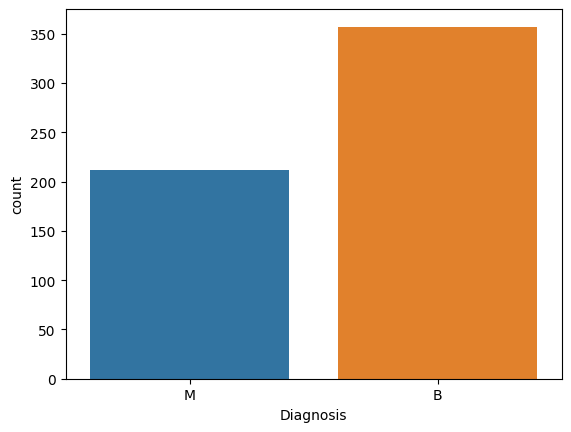

In [ ]:
import seaborn as sns
sns.countplot(data=df,x="Diagnosis")

In [ ]:
#7 Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.
diagnumdict = {'M':1,'B':0}
df['DiagnosisNumeric'] = diagnumdict
df.head()
#this needs diagnosis as index

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,NaN


In [ ]:
#df #569 rows x 33 cols
tf=df.Diagnosis=="M" #mascara donde aparece true si es igual a M y falso si no es igual a M
#df[tf] #nuevo dataframe solo con los true, now there are 212 rows
tf
df["DiagnosisNumeric"]=tf.astype(int)
df.head()
df
#df.somecolumn.replace({True: 1, False: 0})


,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


In [ ]:
#df.iloc[:, 1:10]

In [ ]:
df.iloc[:,2:-1] = df.iloc[:,2:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
#df=(df-df.mean())/df.std()
df

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,NaN,1
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,NaN,1
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,NaN,1
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,NaN,1
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,NaN,1
565,926682,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,NaN,1
566,926954,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,NaN,1
567,927241,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,NaN,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean')])

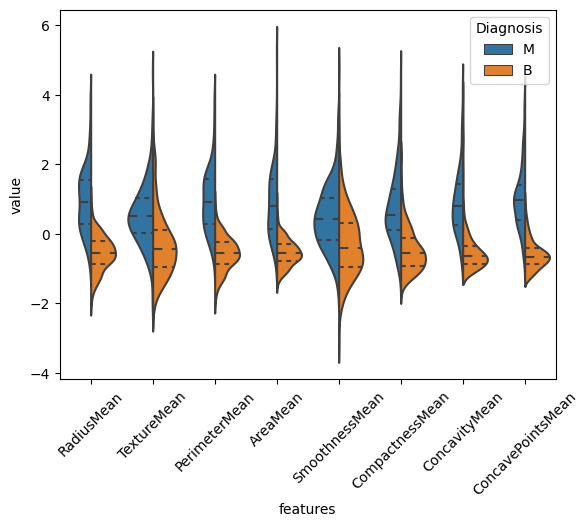

In [ ]:
import matplotlib.pyplot as plt
"""
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
for col in cols:
  print(col)
  data = pd.melt(df.iloc[:, 0:10], id_vars=str(col),var_name="features",value_name="value")
  sns.violinplot(x="features",y="value",  hue=str(col),data=data, split=True, inner="quart")
  plt.xticks(rotation=45)
"""
data = pd.melt(df.iloc[:, 1:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

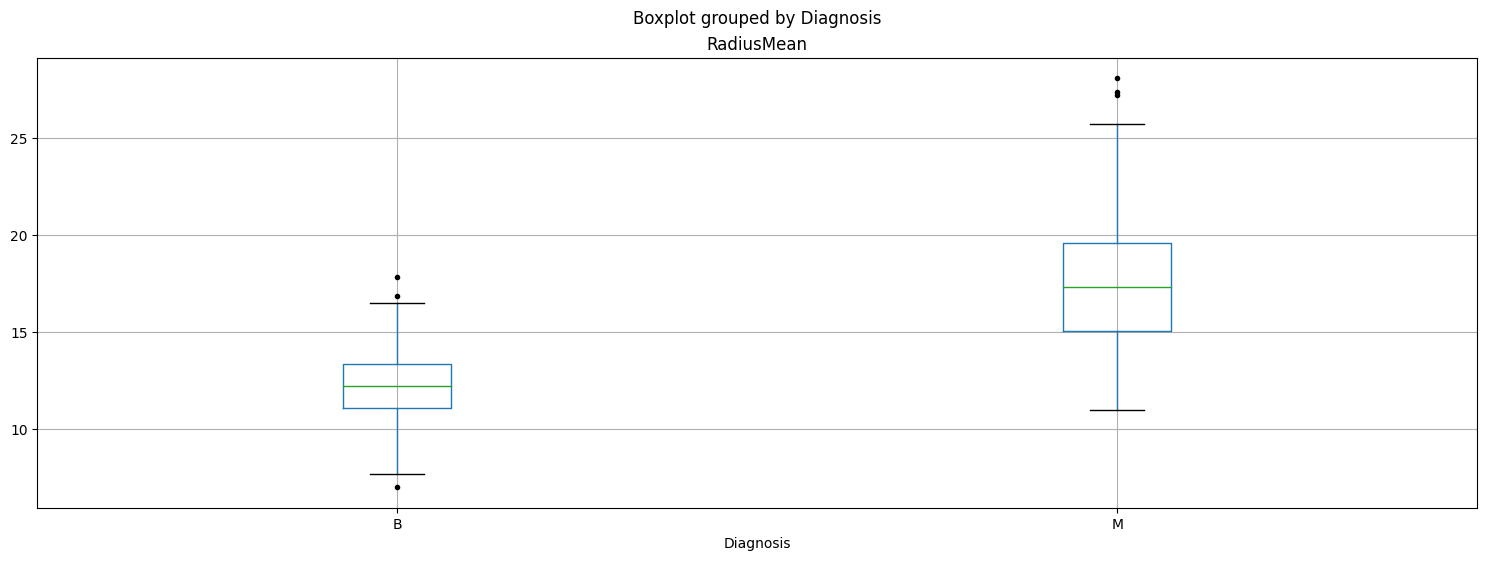

In [ ]:
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))


In [ ]:
Q1 = df["RadiusMean"].quantile(0.25)
Q3 = df["RadiusMean"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["RadiusMean"]< (Q1 - 1.5 * IQR)) | (df["RadiusMean"] > (Q3 + 1.5* IQR)))]
df
# ~ es negacion, | es la compuerta logica "ó"
# los puntos fuera de la barra de error son los datos outlayer, teniendo en cuenta la negacion, a mayor peso del IQR mas datos se eliminan (lo contrario con la negacion)

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

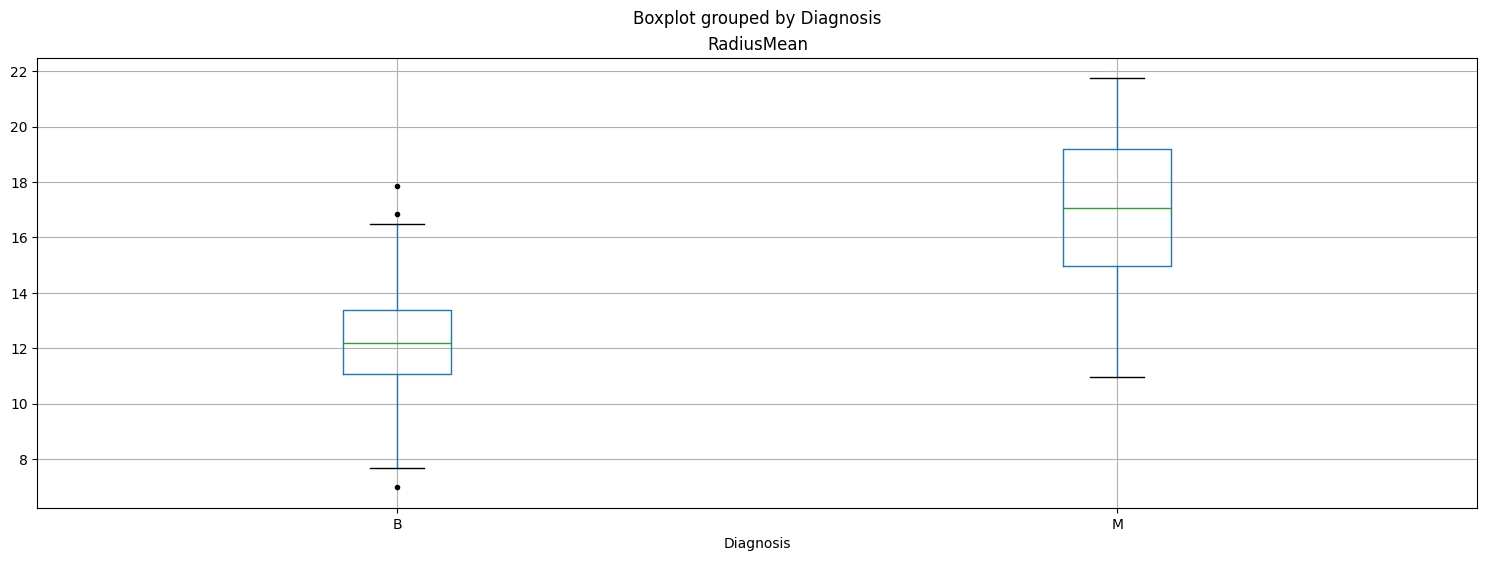

In [ ]:
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))

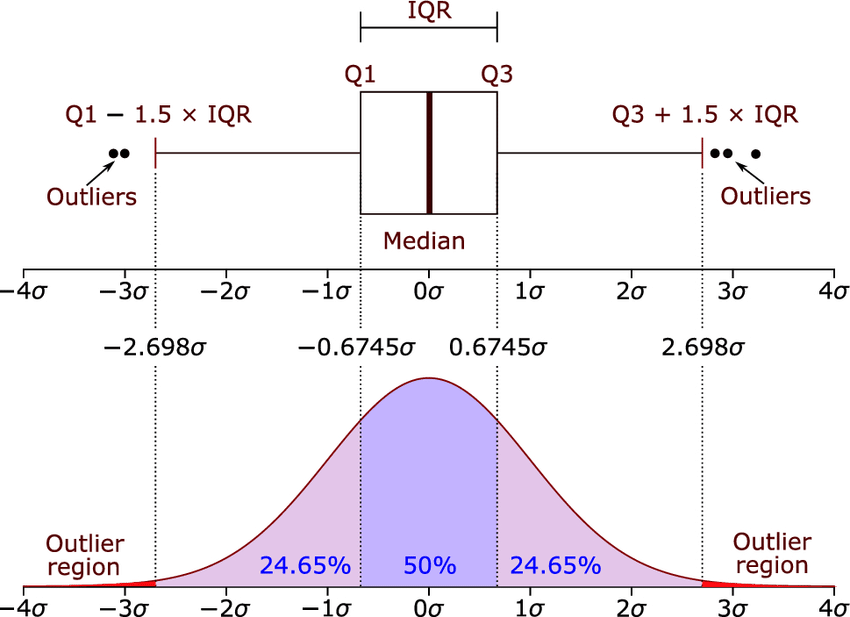

                   RadiusMean  TextureMean  PerimeterMean  AreaMean  \
RadiusMean           1.000000     0.321627       0.997307  0.992206   
TextureMean          0.321627     1.000000       0.328821  0.331730   
PerimeterMean        0.997307     0.328821       1.000000  0.990015   
AreaMean             0.992206     0.331730       0.990015  1.000000   
SmoothnessMean       0.108010    -0.038752       0.149149  0.109289   
CompactnessMean      0.444353     0.221269       0.504132  0.440784   
ConcavityMean        0.600775     0.293565       0.648537  0.609794   
ConcavePointsMean    0.773388     0.284834       0.809217  0.777709   

                   SmoothnessMean  CompactnessMean  ConcavityMean  \
RadiusMean               0.108010         0.444353       0.600775   
TextureMean             -0.038752         0.221269       0.293565   
PerimeterMean            0.149149         0.504132       0.648537   
AreaMean                 0.109289         0.440784       0.609794   
SmoothnessMean 

NameError: ignored

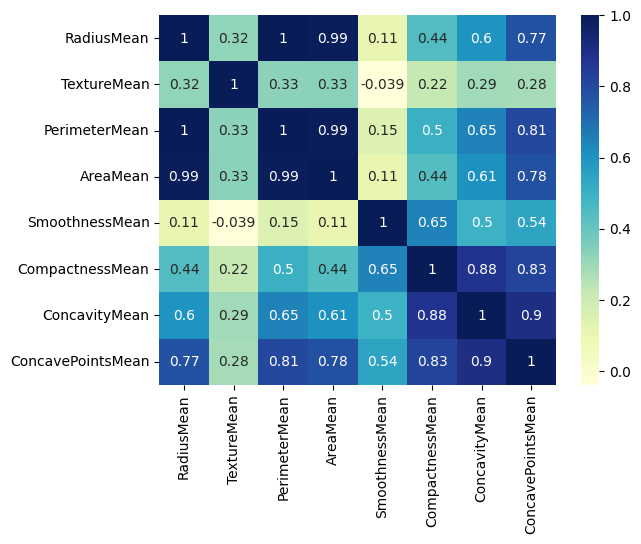

In [ ]:
import seaborn as sb
print(df.iloc[:, 2:10].corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.iloc[:, 2:10].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

#https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

#Time Series

In [ ]:

import pandas as pd
url="https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df=pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
df
tf=df["time"] > "2023"
tf

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Name: time, Length: 5000, dtype: bool

In [ ]:
#df.set_index? #cambiar columna index con datos ya leidos
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [ ]:
import pandas as pd
df = pd.read_csv(url, index_col="time")
#df.isnull().sum()
newdf_closep=df.close #this is a series
#a dataframe is a list (# of series = # of rows) of series
#df.close[1]
#newdf_closep


df_closep=pd.DataFrame( [newdf_closep] )
df_closep=df_closep.T  # or df1.transpose()
type(df_closep)

df_closep


,close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [ ]:
Diff=[]
len(df_closep)
#print(df.iloc[0]['close'])
#print(newdf_closep[1]-newdf_closep[0])
for i in range(len(df_closep)-1): #newdf_closep.size for a series len() for a dataframe
  #dif=abs(newdf_closep[i+1]-newdf_closep[i]) #using the series
  dif=df.iloc[i+1]['close']-df.iloc[i]['close'] #using the dataframe, access a cell value
  Diff.append(dif)
  #print(dif)
Diff.append(dif) #last value doesn't have "next close price" os it is taken as the last closeprice difference value
#or just do
seriesdif=df.close.diff() #df.column is a series, so this is a series
seriesdif
#df_closep=pd.DataFrame( [newdf_closep,seriesdif] )
#df_closep=df_closep.T
#df_closep

#variar el lag para ver correlaciones, cada 12 meses o asi


time
2022-07-25 13:00:00        NaN
2022-07-25 14:00:00   -0.00046
2022-07-25 15:00:00    0.00158
2022-07-25 16:00:00    0.00028
2022-07-25 17:00:00   -0.00304
                        ...   
2023-05-12 19:00:00   -0.00038
2023-05-12 20:00:00    0.00032
2023-05-12 21:00:00   -0.00015
2023-05-12 22:00:00   -0.00013
2023-05-12 23:00:00   -0.00024
Name: close, Length: 5000, dtype: float64

In [ ]:
df_closep["Diff"]=Diff
df_closep

,close,Diff
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,0.00158
2022-07-25 15:00:00,1.02457,0.00028
2022-07-25 16:00:00,1.02485,-0.00304
2022-07-25 17:00:00,1.02181,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,0.00032
2023-05-12 20:00:00,1.08546,-0.00015
2023-05-12 21:00:00,1.08531,-0.00013


In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_closep, *['Diff'], **{})
chart

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   3.,   2.,
          0.,   2.,   2.,   3.,   2.,   4.,   3.,   8.,   5.,   7.,  21.,
         11.,  26.,  31.,  31.,  59.,  98., 130., 195., 307., 433., 655.,
        756., 635., 485., 362., 207., 155.,  96.,  72.,  52.,  31.,  22.,
         17.,  10.,   9.,   5.,   8.,   5.,   5.,   6.,   2.,   3.,   5.,
          0.,   1.,   3.,   0.,   0.,   1.,   2.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.01397  , -0.0136569, -0.0133438, -0.0130307, -0.0127176,
        -0.0124045, -0.0120914, -0.0117783, -0.0114652, -0.0111521,
        -0.010839 , -0.0105259, -0.0102128, -0.0098997, -0.0095866,
        -0.0092735, -0.0089604, -0.0086473, -0.0083342, -0.0080211,
        -0.007708 , -0.0073949, -0.0070818, -0

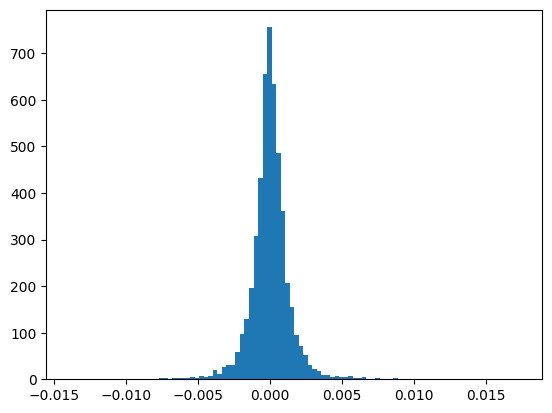

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_closep.Diff,bins=100)
#!pip install fitter

In [ ]:
df_closep

,close,Diff
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,0.00158
2022-07-25 15:00:00,1.02457,0.00028
2022-07-25 16:00:00,1.02485,-0.00304
2022-07-25 17:00:00,1.02181,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,0.00032
2023-05-12 20:00:00,1.08546,-0.00015
2023-05-12 21:00:00,1.08531,-0.00013


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1673.746728,9.949910,36.018682,inf,0.011064,5.691920e-01
lognorm,106576.283201,3075.224888,3094.776468,inf,0.091640,5.449036e-37
beta,106749.902018,3162.092975,3188.161747,inf,0.090791,2.578076e-36
norm,106819.704094,3181.817126,3194.851512,inf,0.090568,3.868498e-36
burr,721976.342039,-597.804692,-571.735919,inf,0.386415,0.000000e+00


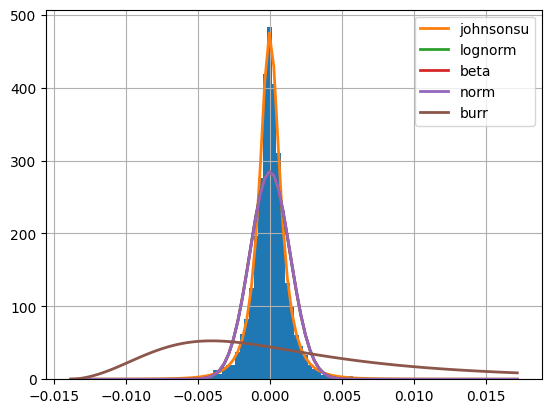

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df_closep.Diff,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "johnsonsu"
                          ])
f.fit()
f.summary()
#hipergeomtric,jonsu

In [ ]:
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

{'burr': {'c': 0.6002529171262088,
  'd': 1.244912881311171,
  'loc': -0.009229999999999851,
  'scale': 0.053773215358417586}}

In [ ]:
#tf=df["time"] > "2023"
df_closep2023=df_closep[df_closep.index>"2023"]
df_closep2023
#los outliers podrian ser relevantes en series de tiempo

NameError: ignored

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,2.149597e+05,804.854569,822.047728,inf,0.093982,5.814022e-18
norm,2.149646e+05,792.011973,803.474079,inf,0.093766,6.997216e-18
beta,2.149717e+05,795.936460,818.860672,inf,0.093759,7.043371e-18
gamma,2.195428e+05,803.022101,820.215260,inf,0.097508,2.643107e-19
burr,1.920174e+06,-465.330436,-442.406224,inf,0.598388,0.000000e+00


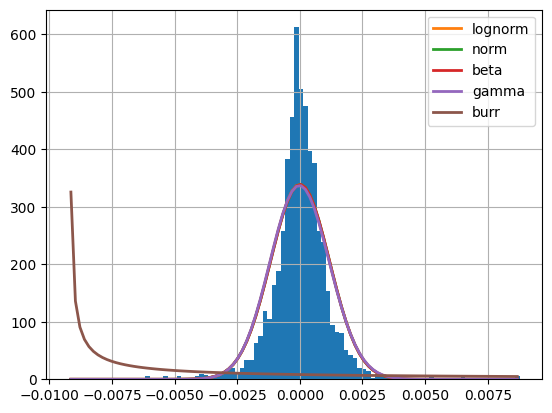

In [ ]:
f = Fitter(df_closep2023.Diff,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

{'lognorm': {'s': 0.006525281287275385,
  'loc': -0.18031109897330588,
  'scale': 0.1803166333796462}}

In [ ]:
#df_closep2023.groupby(pd.timeGrouper(level="time", freq='15D')) #or level=0
df1=df_closep2023.reset_index() #the dataframe but "time" is no the index
#df1.groupby(pd.Grouper(key='time', freq='15D')).mean()
#this doesnt work cause all this time the "time" column has had the character of "Index", dataframe was read like that instead of using df.set_index

#using reset_index()
#groupby is a function or method? from the dataframe which choose the data from the dataframe and grouper is the criteria
df1['time'] = pd.to_datetime(df1['time'])
df1.groupby(pd.Grouper(key='time', freq='15D')).mean()

#even without reset_index()
df_closep2023.index = pd.to_datetime(df_closep2023.index)
df_closep2023.groupby(pd.Grouper(level="time", freq='15D')).mean() #or level=0

#tsdf.resample("1D").mean()
#https://www.programcreek.com/python/example/125186/pandas.Grouper

,close,Diff
time,,
2023-01-02,1.069361,0.000054
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000028
2023-03-18,1.080936,0.000072
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000007
2023-05-02,1.098889,-0.000059


2023-01-31 00:00:00                        close     Diff
time                                 
2023-01-02 00:00:00  1.06796  0.00169
2023-01-02 01:00:00  1.06965  0.00093
2023-01-02 02:00:00  1.07058 -0.00162
2023-01-02 03:00:00  1.06896 -0.00016
2023-01-02 04:00:00  1.06880  0.00003
...                      ...      ...
2023-01-31 19:00:00  1.08651  0.00073
2023-01-31 20:00:00  1.08724 -0.00083
2023-01-31 21:00:00  1.08641  0.00083
2023-01-31 22:00:00  1.08724 -0.00106
2023-01-31 23:00:00  1.08618 -0.00020

[528 rows x 2 columns]


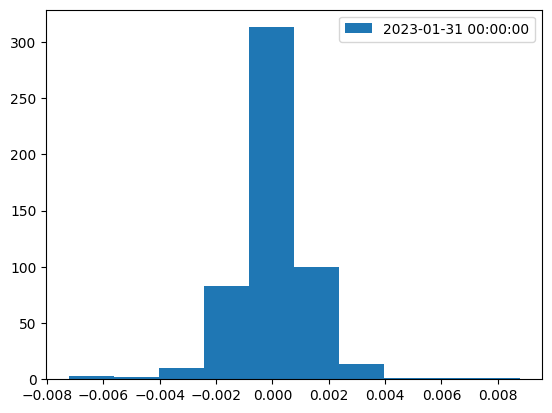

2023-02-28 00:00:00                        close     Diff
time                                 
2023-02-01 00:00:00  1.08598  0.00009
2023-02-01 01:00:00  1.08607  0.00017
2023-02-01 02:00:00  1.08624 -0.00051
2023-02-01 03:00:00  1.08573 -0.00033
2023-02-01 04:00:00  1.08540  0.00087
...                      ...      ...
2023-02-28 19:00:00  1.06055 -0.00142
2023-02-28 20:00:00  1.05913 -0.00078
2023-02-28 21:00:00  1.05835 -0.00075
2023-02-28 22:00:00  1.05760 -0.00019
2023-02-28 23:00:00  1.05741  0.00026

[480 rows x 2 columns]


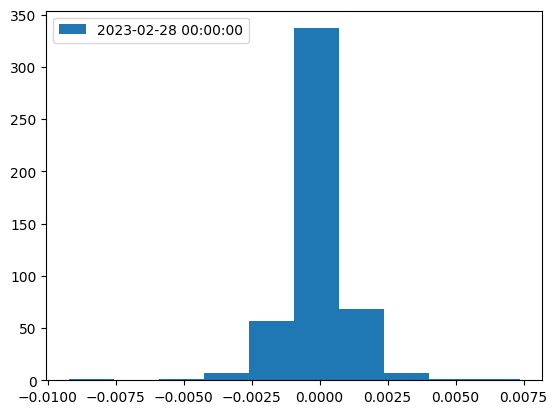

2023-03-31 00:00:00                        close     Diff
time                                 
2023-03-01 00:00:00  1.05767  0.00002
2023-03-01 01:00:00  1.05769 -0.00087
2023-03-01 02:00:00  1.05682  0.00161
2023-03-01 03:00:00  1.05843 -0.00010
2023-03-01 04:00:00  1.05833  0.00100
...                      ...      ...
2023-03-31 19:00:00  1.08693 -0.00162
2023-03-31 20:00:00  1.08531  0.00021
2023-03-31 21:00:00  1.08552 -0.00095
2023-03-31 22:00:00  1.08457 -0.00044
2023-03-31 23:00:00  1.08413 -0.00007

[550 rows x 2 columns]


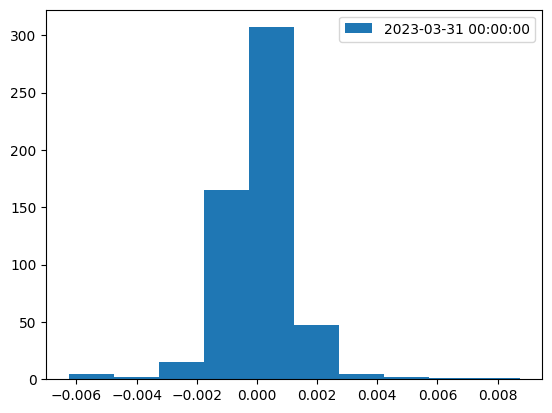

2023-04-30 00:00:00                        close     Diff
time                                 
2023-04-03 00:00:00  1.08406 -0.00212
2023-04-03 01:00:00  1.08194 -0.00169
2023-04-03 02:00:00  1.08025  0.00112
2023-04-03 03:00:00  1.08137 -0.00062
2023-04-03 04:00:00  1.08075 -0.00138
...                      ...      ...
2023-04-28 19:00:00  1.10306 -0.00068
2023-04-28 20:00:00  1.10238 -0.00068
2023-04-28 21:00:00  1.10170  0.00024
2023-04-28 22:00:00  1.10194 -0.00035
2023-04-28 23:00:00  1.10159  0.00030

[480 rows x 2 columns]


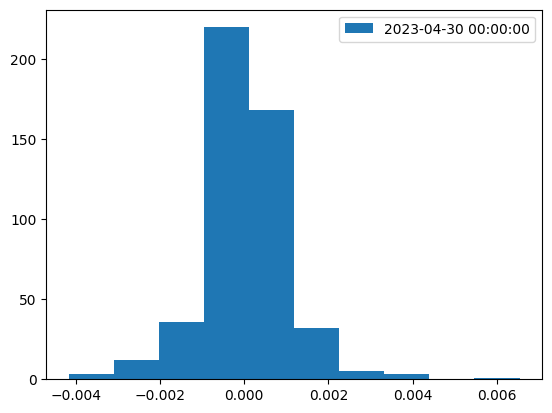

2023-05-31 00:00:00                        close     Diff
time                                 
2023-05-01 00:00:00  1.10189 -0.00074
2023-05-01 01:00:00  1.10115 -0.00009
2023-05-01 02:00:00  1.10106 -0.00052
2023-05-01 03:00:00  1.10054 -0.00015
2023-05-01 04:00:00  1.10039  0.00041
...                      ...      ...
2023-05-12 19:00:00  1.08514  0.00032
2023-05-12 20:00:00  1.08546 -0.00015
2023-05-12 21:00:00  1.08531 -0.00013
2023-05-12 22:00:00  1.08518 -0.00024
2023-05-12 23:00:00  1.08494 -0.00024

[240 rows x 2 columns]


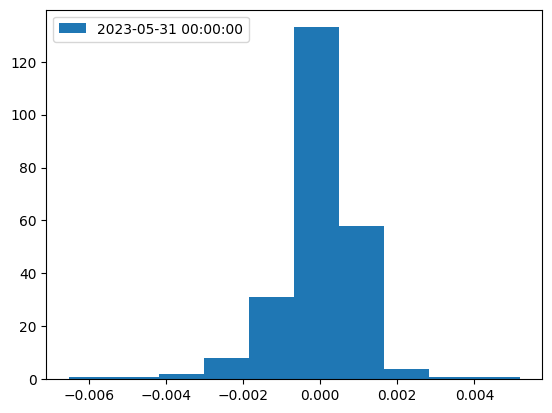

In [ ]:
q=df_closep2023.groupby(pd.Grouper(level="time", freq='1M'))

for name, group in q:
  print(name, group) #name is a label, group is a dataframe
  #print(type(group))
  plt.hist(group.Diff,label=name)
  plt.legend()
  plt.show()

  #overlapping densities (ridge plot) could be used to show all histogram
  #df.index.month